# Klastrowanie hierarchiczne

https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram

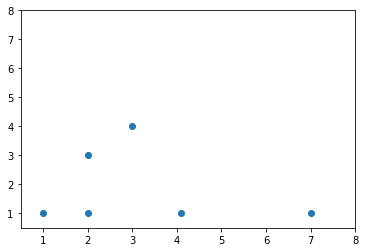

In [4]:
dane = np.array([[1,1],[2,1],[4.1,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

In [5]:
d = linkage(dane)
d

array([[ 0.        ,  1.        ,  1.        ,  2.        ],
       [ 4.        ,  5.        ,  1.41421356,  2.        ],
       [ 6.        ,  7.        ,  2.        ,  4.        ],
       [ 2.        ,  8.        ,  2.1       ,  5.        ],
       [ 3.        ,  9.        ,  2.9       ,  6.        ]])

In [7]:
#?linkage

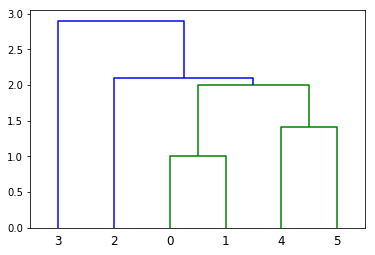

In [8]:
dendrogram(d)
plt.show()

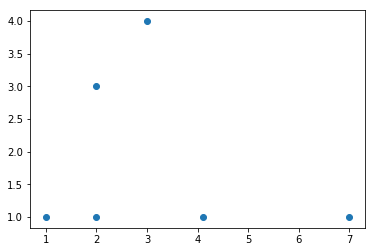

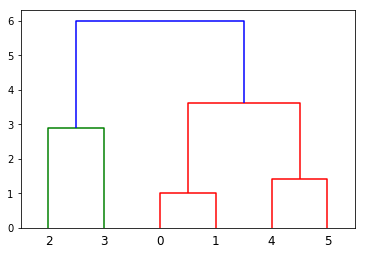

In [9]:
d = linkage(dane,"complete")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

# Metoda Ward
Metoda Ward - odległość jest równa wzrostowi sumy kwadratów odległości w w yniku połączenia danych dwóch klastrów (uwaga: są różne równoważne definicje tej miary). Metoda Ward minimalizuje wzrost wariancji (inercji).

$d(i,j) = SS_{i\cup j} - (SS_i + SS_j)$

$SS(C) = \sum\limits_{x\in C} (x - \mu_C)^2$

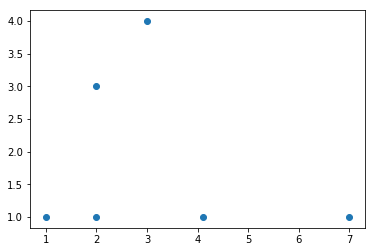

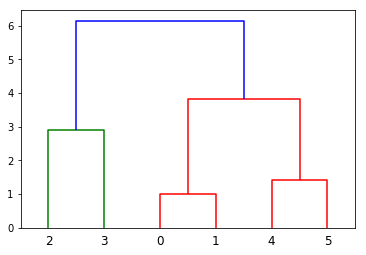

In [10]:
d = linkage(dane,"ward")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

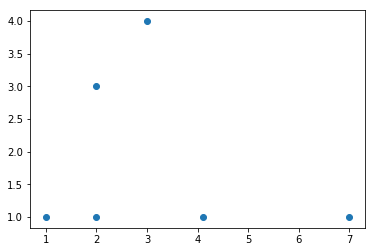

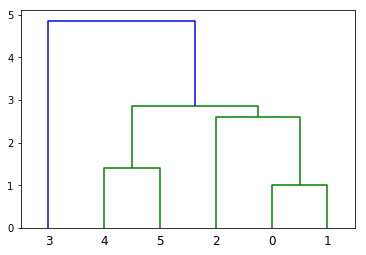

In [11]:
d = linkage(dane,"average")
plt.scatter(dane[:,0],dane[:,1])
plt.show()
dendrogram(d)
plt.show()

# Zadanie 
Prosze pokazowe na przećwiczenie miar

In [17]:
import numpy.random as rnd
rnd.seed(123)
points = np.concatenate([rnd.multivariate_normal((0,0),np.array([[0.1,0],[0,10]]),30),
                    rnd.multivariate_normal((6,5),np.array([[10,0],[0,0.1]]),30),
                    rnd.multivariate_normal((8,-2),np.array([[1,0],[0,1]]),30)],axis=0)
labels = np.repeat(range(3),30)

In [18]:
import seaborn as sns
colors = sns.color_palette("Set2", 20)

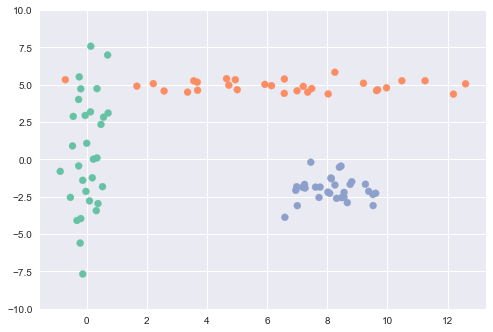

In [19]:
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels])
plt.ylim(-10,10)
plt.show()

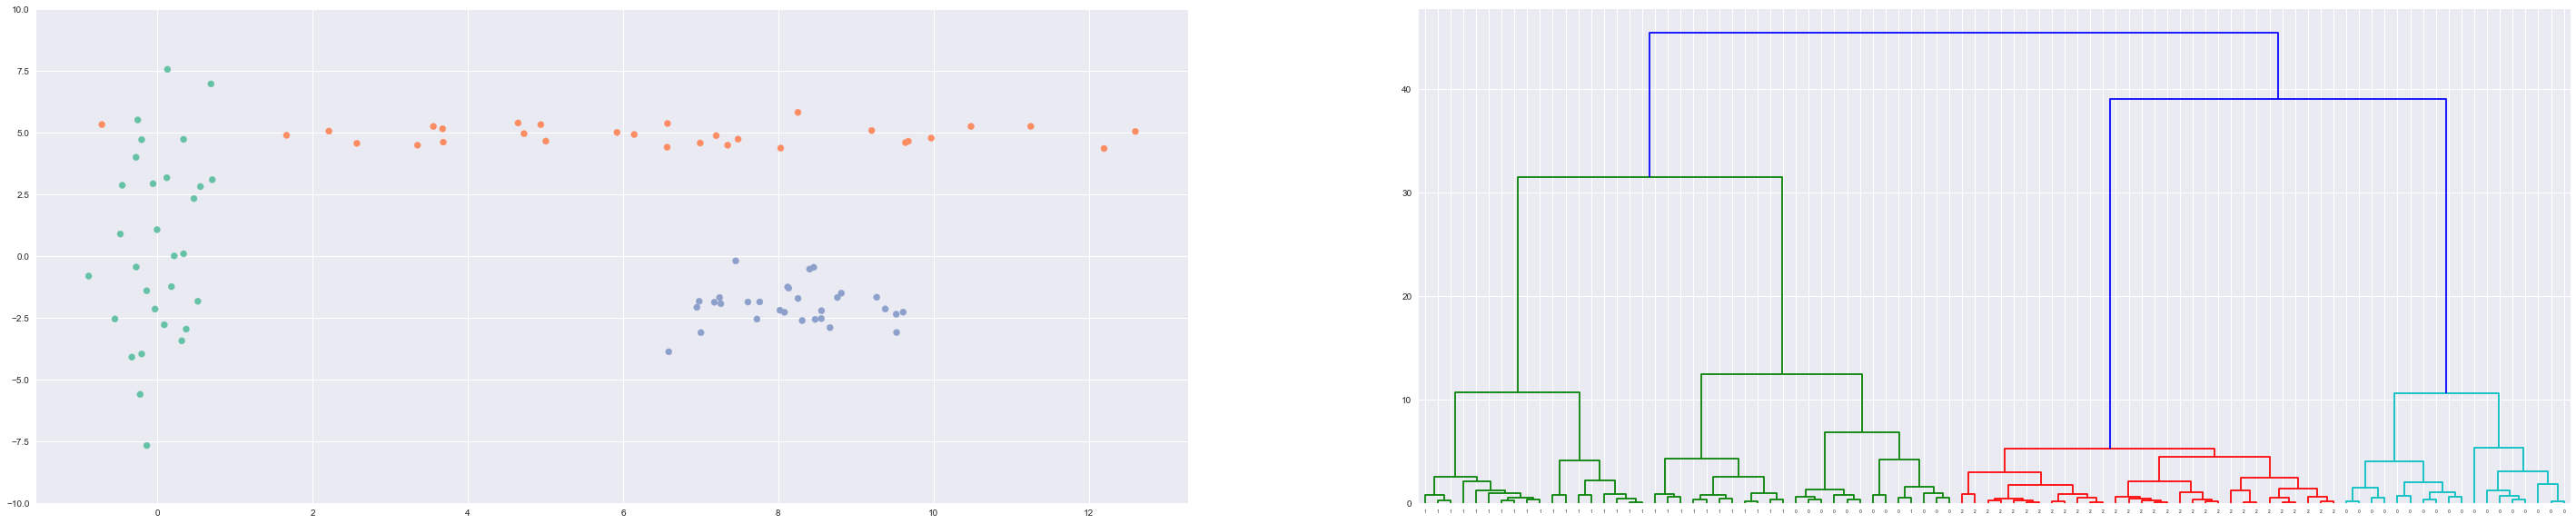

In [20]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="ward")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

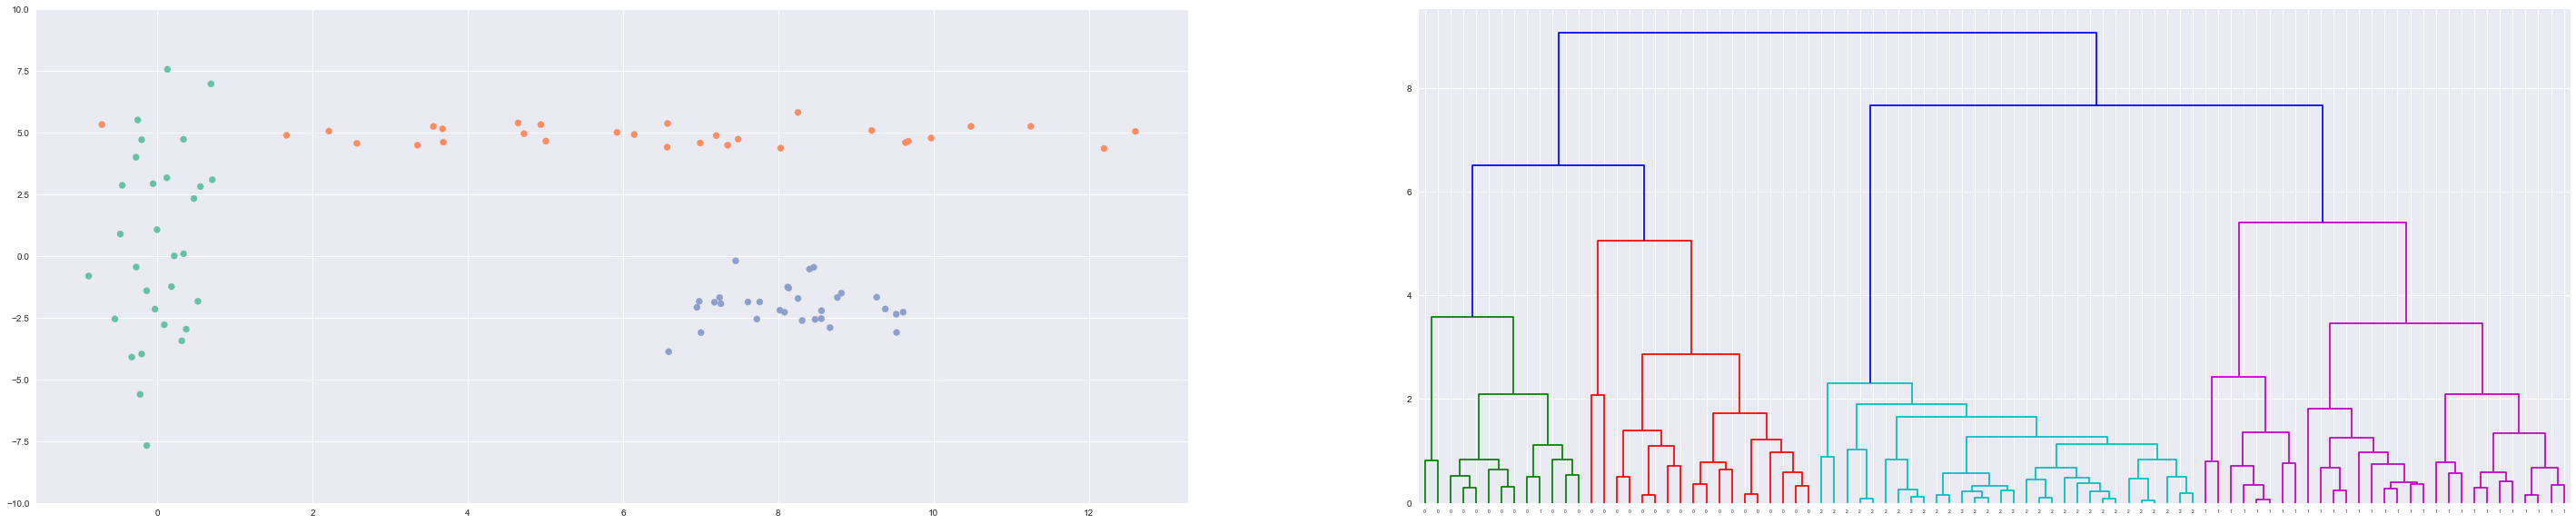

In [21]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="average")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

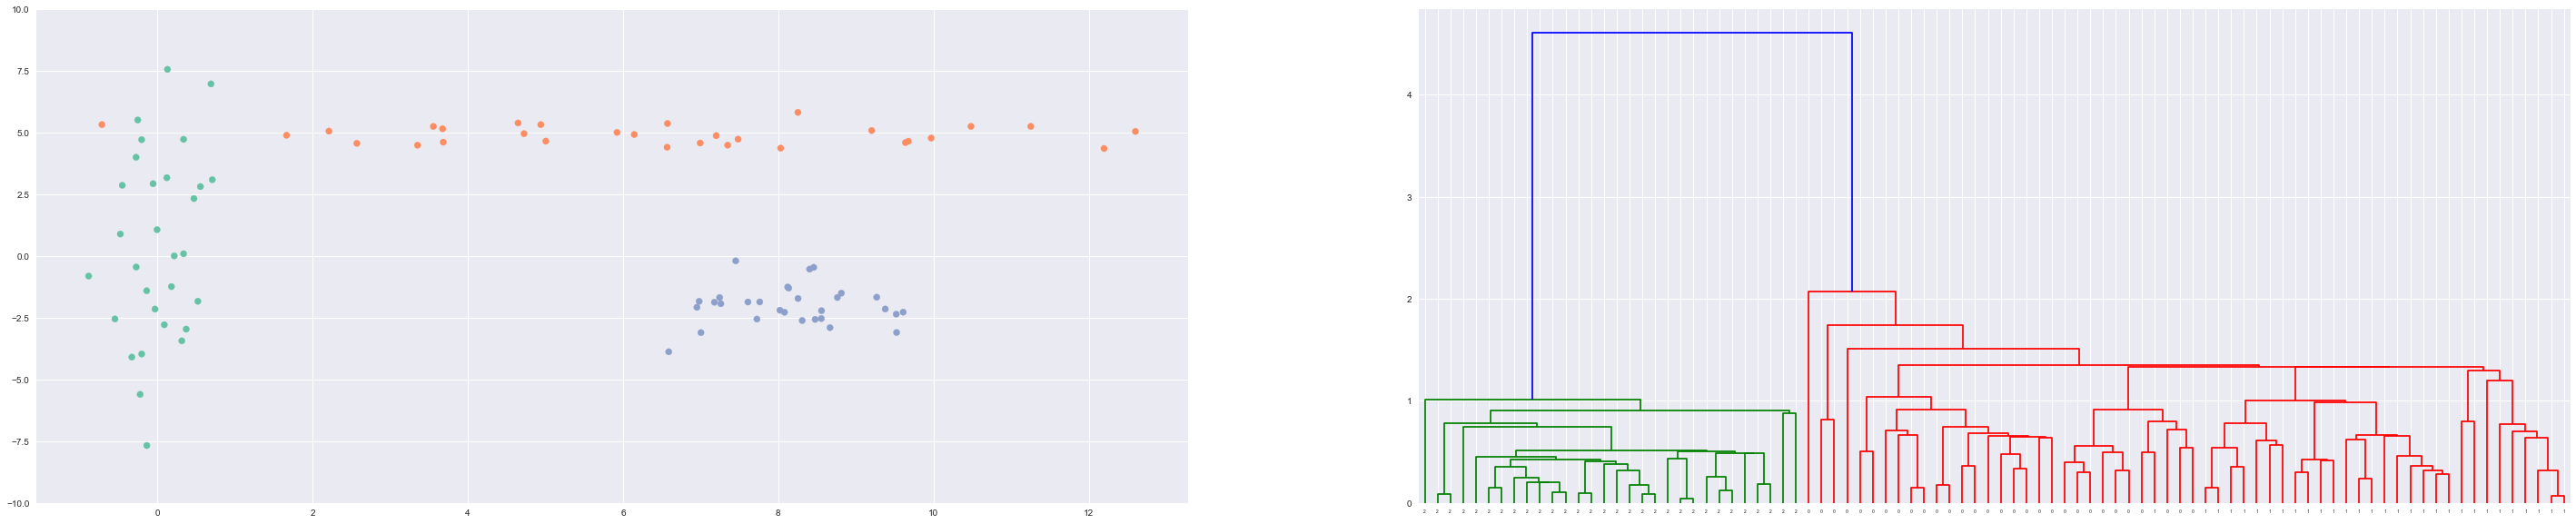

In [22]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="single")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

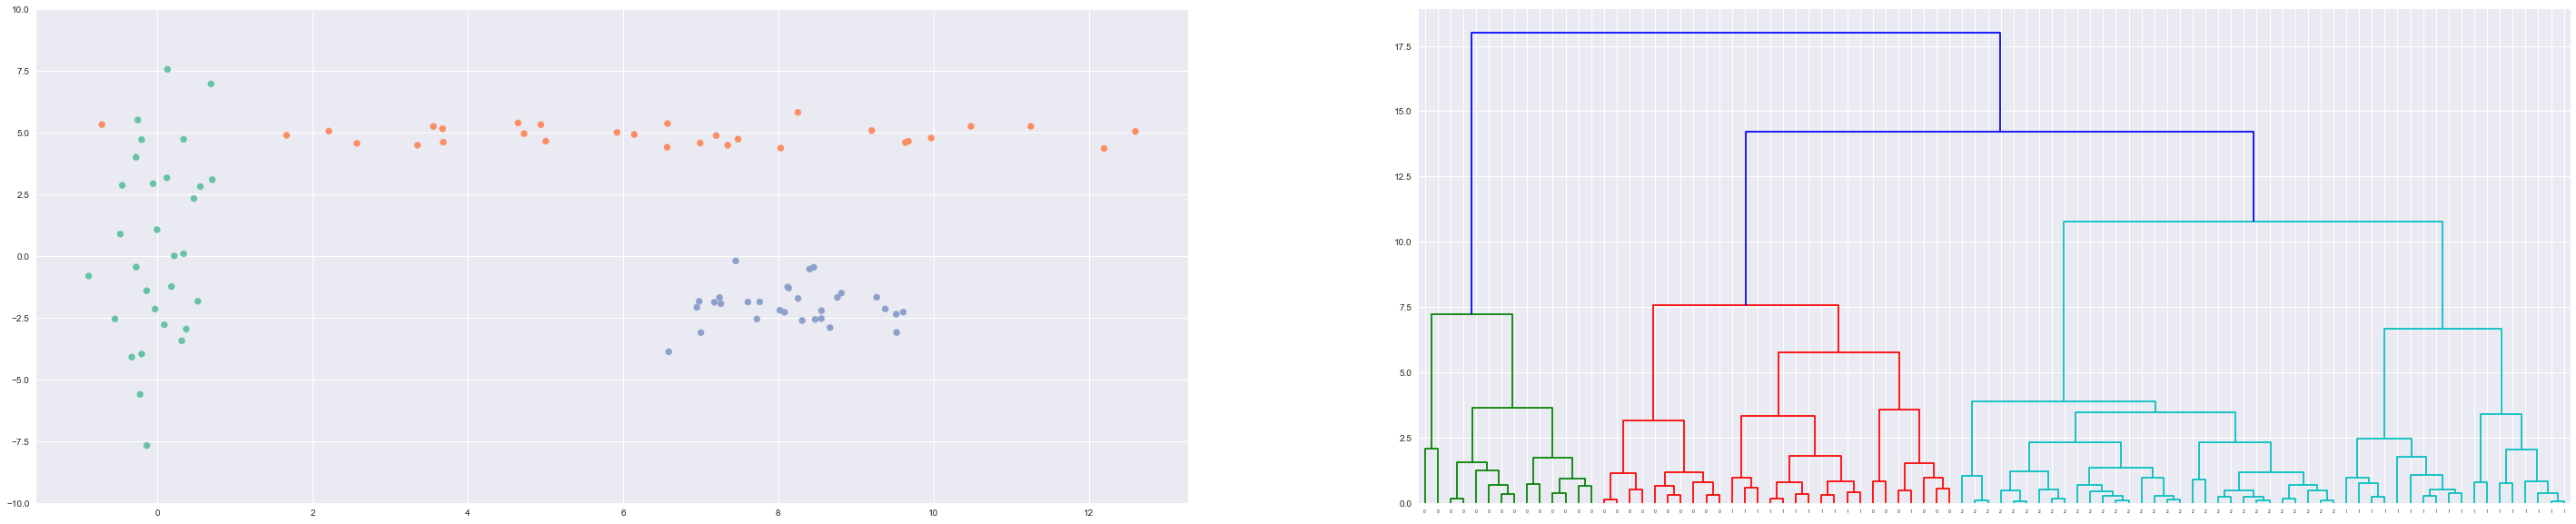

In [23]:
plt.figure(figsize=(50,10))
plt.subplot(1,2,1)
plt.scatter(points[:,0],points[:,1],c=np.array(colors)[labels],s=50)
plt.ylim(-10,10)

plt.subplot(1,2,2)
l = linkage(points,method="complete")
dendrogram(l,labels=labels,leaf_rotation=0)
plt.show()

# Zadanie

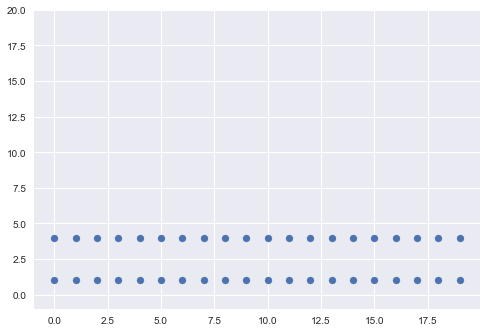

In [24]:
x = np.vstack([np.tile(range(20),2),np.repeat(np.array([1,4]),20)]).T

plt.scatter(x[:,0],x[:,1])
plt.ylim(-1,20)
plt.show()

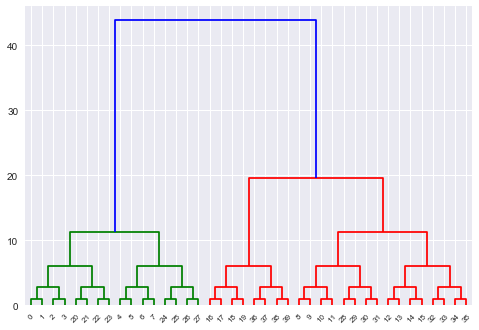

In [25]:
m = linkage(x,"ward")
dendrogram(m)
plt.show()

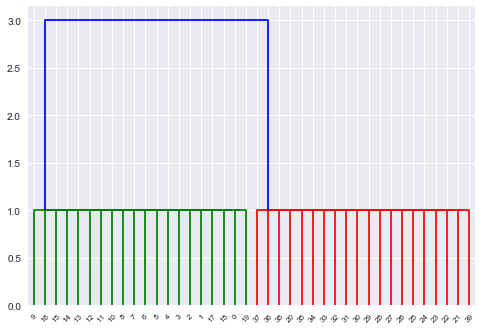

In [26]:
m = linkage(x,"single")
dendrogram(m)
plt.show()

# Zadanie
Grupowanie ziaren zbóż

In [30]:
samples = np.loadtxt("F:\\SZKOLENIE\\data_analysis\\AD01\\seeds_dataset.txt")
samples = pd.DataFrame(samples)
samples.columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", 
                   "kernel_groove_length", "variety"]

In [31]:
samples.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1.0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1.0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1.0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1.0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1.0


In [33]:
samples.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [34]:
from sklearn.preprocessing import StandardScaler #, scale

sc = StandardScaler()
samples2 = pd.DataFrame(sc.fit_transform(samples.iloc[:,0:-1]),columns=samples.columns[:-1])
samples2["variety"] = samples.variety

In [35]:
samples2.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.000000
mean,-1.895309e-15,-2.585762e-15,1.325857e-15,-4.007376e-15,-2.648675e-16,5.952910e-16,-1.469724e-16,2.000000
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,0.818448
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00,1.000000
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01,1.000000
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01,2.000000
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01,3.000000
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00,3.000000


Najpierw zrobić na surowych danych, a potem na przeskalowanych - przeanalizować zachowanie różnych łączeń

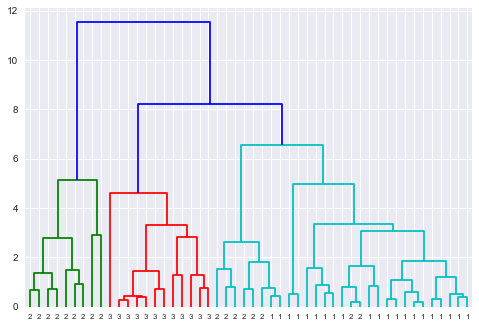

In [37]:
samples3 = np.array(samples.sample(n=50))

mergings = linkage(samples3[:,0:7],method="complete")

dendrogram(mergings,
           labels=samples3[:,7].astype(int),
           leaf_rotation=0,
           leaf_font_size=8,
)
plt.show()

# Wyznaczanie liczby klastrów

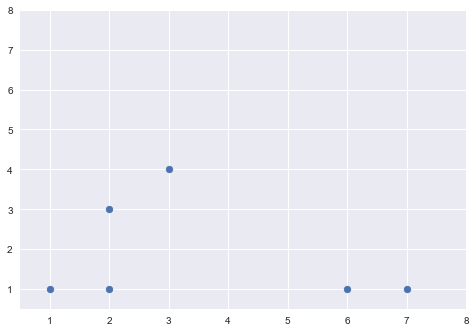

In [39]:
dane = np.array([[1,1],[2,1],[6,1],[7,1],[2,3],[3,4]])
plt.scatter(dane[:,0],dane[:,1])
plt.xlim(0.5,8)
plt.ylim(0.5,8)
plt.show()

## 1. Na podstawie dendrogramu

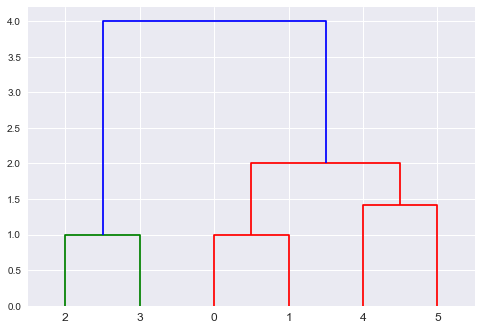

In [41]:
mergings = linkage(dane,method="single")
dendrogram(mergings)
plt.show()

Intuicja - obcinamy tam, gdzie skok już jest "duży" lub na oko oceniamy ile sensownych klastrów tu widzimy

Jak mamy duży zbiór, to można wylosować próbkę, na której można wizualnie ocenić próg obcięcia

In [43]:
from scipy.cluster.hierarchy import fcluster

#?fcluster

In [44]:
fcluster(mergings,t=1,criterion="distance")

array([2, 2, 1, 1, 3, 4], dtype=int32)

## 2. Gdy wiemy ile chcemy mieć klastrów:

In [46]:
fcluster(mergings,3,"maxclust")

array([2, 2, 1, 1, 3, 3], dtype=int32)

# Zadanie 
Proszę wyznaczyć liczbę clustrów dla zbioru ziaren.

In [48]:
samples = np.loadtxt("F:\\SZKOLENIE\\data_analysis\\AD01\\seeds_dataset.txt")
samples = pd.DataFrame(samples)
samples.columns = ["area", "perimeter", "compactness", "kernel_length", "kernel_width", "asymmetry", 
                   "kernel_groove_length", "variety"]

In [49]:
from sklearn.preprocessing import StandardScaler #, scale

sc = StandardScaler()
samples2 = pd.DataFrame(sc.fit_transform(samples.iloc[:,0:-1]),columns=samples.columns[:-1])
samples2["variety"] = samples.variety

samples2.describe()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry,kernel_groove_length,variety
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,210.000000
mean,-1.895309e-15,-2.585762e-15,1.325857e-15,-4.007376e-15,-2.648675e-16,5.952910e-16,-1.469724e-16,2.000000
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,0.818448
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00,1.000000
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01,1.000000
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01,2.000000
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01,3.000000
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00,3.000000


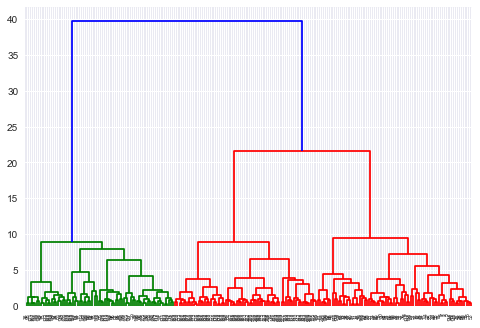

variety  1.0  2.0  3.0
row_0                 
1          4   66    0
2          2    0   65
3         64    4    5


0.74981575189284588

In [50]:
mergings = linkage(samples2.iloc[:,:-1],"ward")
labels = fcluster(mergings,15,criterion="distance")
dendrogram(mergings)
plt.show()
ct = pd.crosstab(labels,samples.variety)

# Display ct
print(ct)
from sklearn.metrics.cluster import v_measure_score
v_measure_score(labels, samples.variety)

# Zadanie 
Proszę pogrupować hierarchicznie kraje na podstawie oddanych przez nie głosów w eurowizji

In [65]:
dane = pd.read_csv("F:\\SZKOLENIE\\data_analysis\\AD01\\eurowizja.csv", sep=",")
#dane.set_index(dane.columns[0],inplace=True)
dane

,Ukraine,Belarus,Azerbaijan,Iceland,Norway,Romania,Armenia,Montenegro,Greece,Poland,...,Slovenia,Finland,Spain,Switzerland,Hungary,Malta,Denmark,Netherlands,San Marino,United Kingdom
Albania,0,0,0,0,0,0,0,6,0,2,...,0,0,12,0,8,1,0,0,3,0
Armenia,0,8,0,0,0,0,0,12,0,7,...,0,0,2,5,0,0,1,4,3,0
Austria,5,0,0,2,1,8,12,0,0,0,...,0,4,0,3,7,0,0,10,0,0
Azerbaijan,10,7,0,0,0,6,0,0,2,4,...,0,0,0,0,8,5,0,0,3,0
Belarus,8,0,3,0,4,1,10,0,7,6,...,0,0,0,0,5,0,0,2,0,0
Belgium,4,0,0,0,0,5,0,0,0,0,...,0,3,2,0,7,0,6,8,0,1
Denmark,1,0,0,5,6,0,2,0,0,0,...,0,4,0,0,3,0,0,10,0,7
Estonia,8,0,0,0,3,0,5,0,0,0,...,0,6,2,0,7,0,0,12,0,0
Finland,0,0,0,0,0,4,8,12,5,0,...,1,0,0,0,10,0,0,7,0,0
France,2,0,0,0,7,0,4,0,0,0,...,0,0,0,0,5,3,6,8,0,0


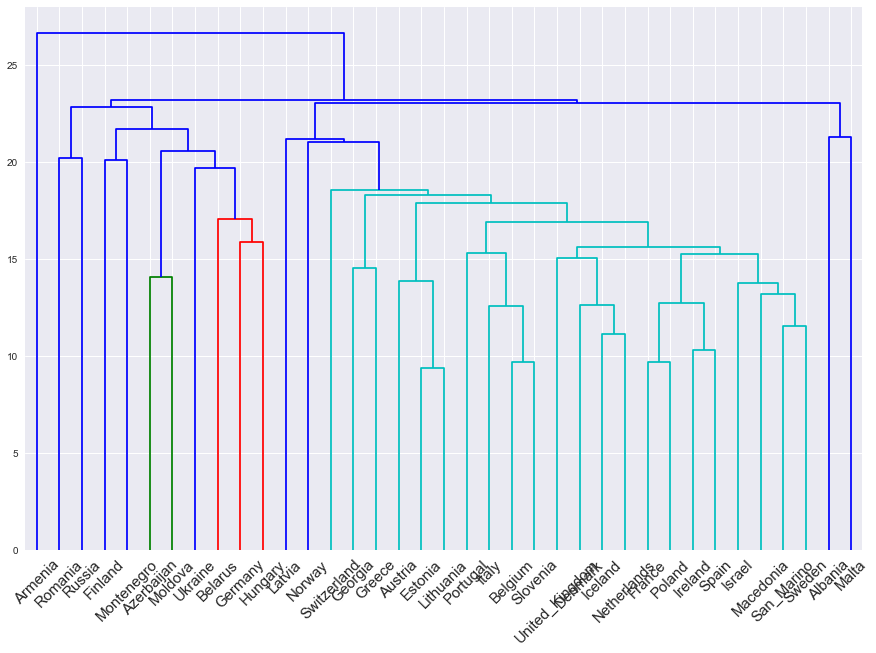

In [66]:
mergings = linkage(dane,metric="euclidean",method="average")

plt.figure(figsize=(15,10))
dendrogram(mergings, 
           labels = dane.index, 
           leaf_rotation=45,
           leaf_font_size=15)
plt.show()